# Import libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df=pd.read_csv(URL)
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [3]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [5]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


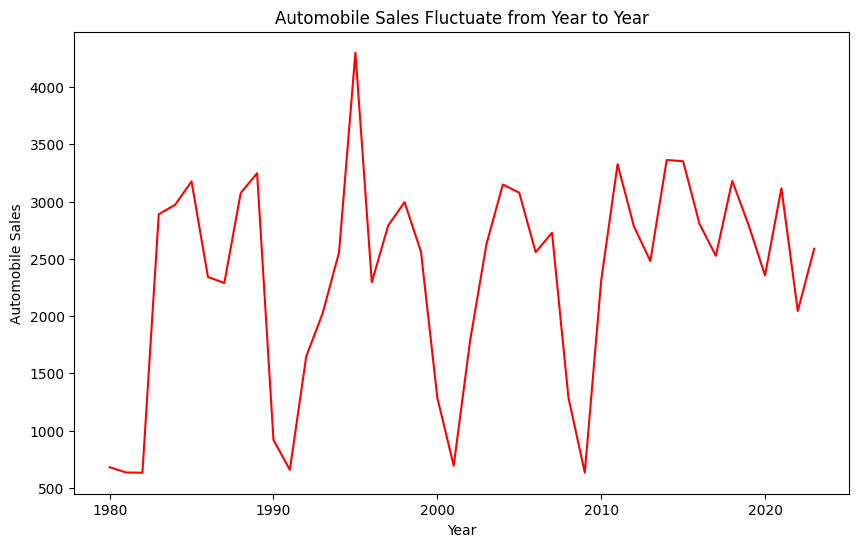

In [6]:
df1=df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
df1.plot(kind='line', color='r')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title("Automobile Sales Fluctuate from Year to Year")
plt.show()

### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br> 


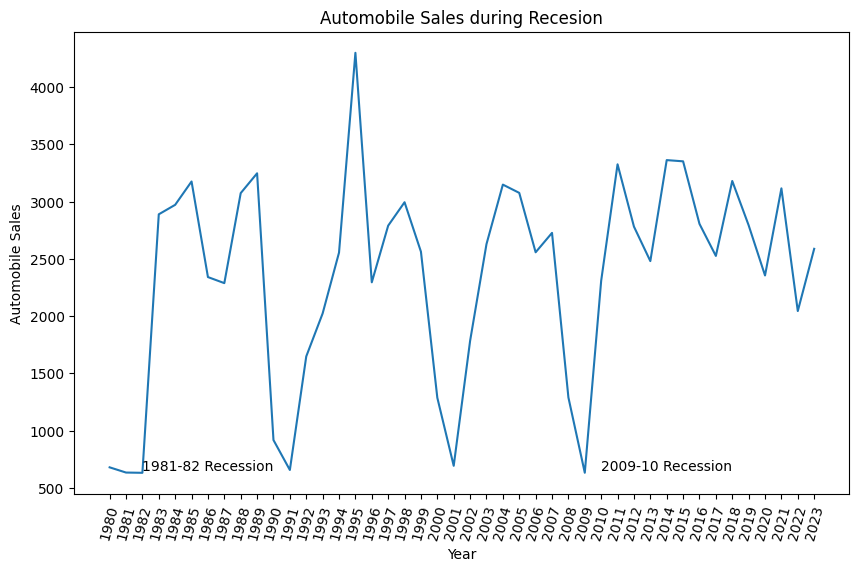

In [7]:
plt.figure(figsize=(10,6))
df1.plot(kind='line')
plt.xticks(list(range(1980,2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title("Automobile Sales during Recesion")
plt.text(1982, 650, '1981-82 Recession')
plt.text(2010, 650, '2009-10 Recession')
plt.show()


####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


In [8]:
df_rec=df[df['Recession']==1]
df_Mline=df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.head()

,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,720.625000
1,1980,Smallfamiliycar,695.233333
2,1980,Supperminicar,635.840000
3,1981,Mediumfamilycar,628.400000
4,1981,Smallfamiliycar,638.420000


In [9]:
df_Mline['Normalized_Sales']=df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x:x/x.mean())

In [10]:
df_Mline.head()

,Year,Vehicle_Type,Automobile_Sales,Normalized_Sales
0,1980,Mediumfamilycar,720.625000,1.074659
1,1980,Smallfamiliycar,695.233333,1.049896
2,1980,Supperminicar,635.840000,0.947466
3,1981,Mediumfamilycar,628.400000,0.937125
4,1981,Smallfamiliycar,638.420000,0.964100


In [11]:
df_Mline.set_index('Year', inplace=True)
df_Mline.head()

,Vehicle_Type,Automobile_Sales,Normalized_Sales
Year,,,
1980,Mediumfamilycar,720.625000,1.074659
1980,Smallfamiliycar,695.233333,1.049896
1980,Supperminicar,635.840000,0.947466
1981,Mediumfamilycar,628.400000,0.937125
1981,Smallfamiliycar,638.420000,0.964100


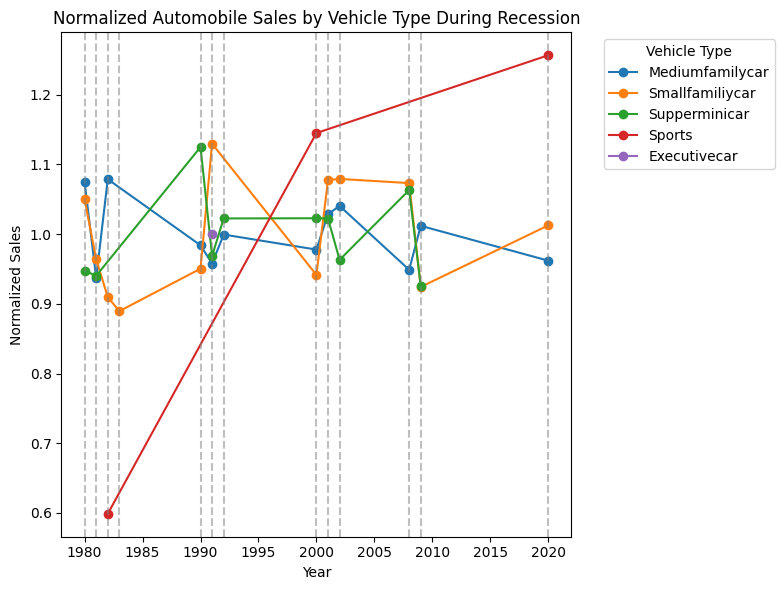

In [12]:
# Create the plot for each vehicle type
plt.figure(figsize=(8, 6))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


In [13]:
new_df=df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

In [14]:
new_df.head()

,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


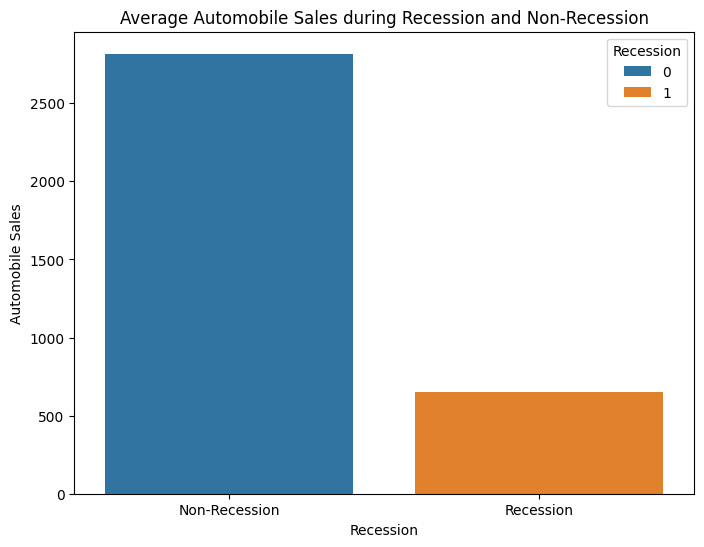

In [15]:
new_df=df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Recession')
plt.ylabel("Automobile Sales")
plt.title("Average Automobile Sales during Recession and Non-Recession")
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.show()

In [16]:
   # Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    # Create the grouped bar chart using seaborn

In [32]:
dd

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222
5,1,Executivecar,564.000000
6,1,Mediumfamilycar,674.847619
7,1,Smallfamiliycar,650.733333
8,1,Sports,170.333333
9,1,Supperminicar,659.270968


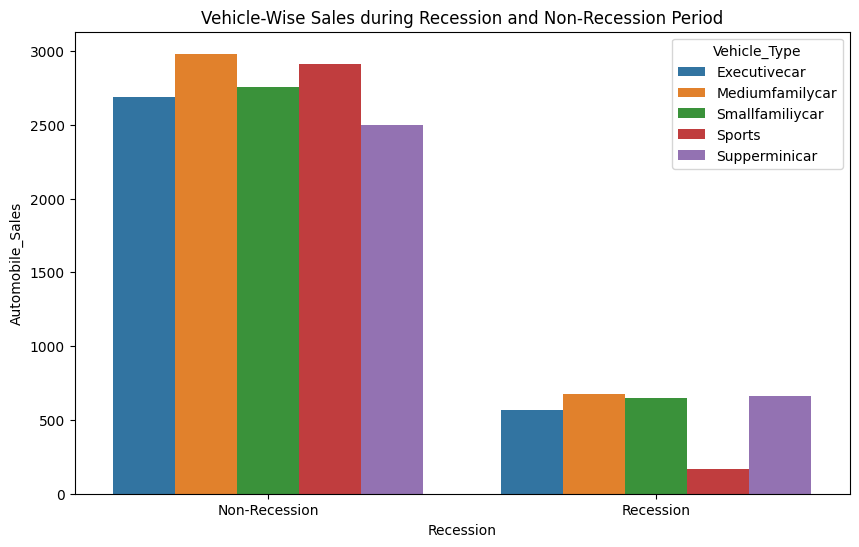

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
#plt.xlabel('.............')
#plt.ylabel('..............')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


In [18]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


In [40]:
non_rec_data = df[df['Recession'] == 0]

 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


In [41]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

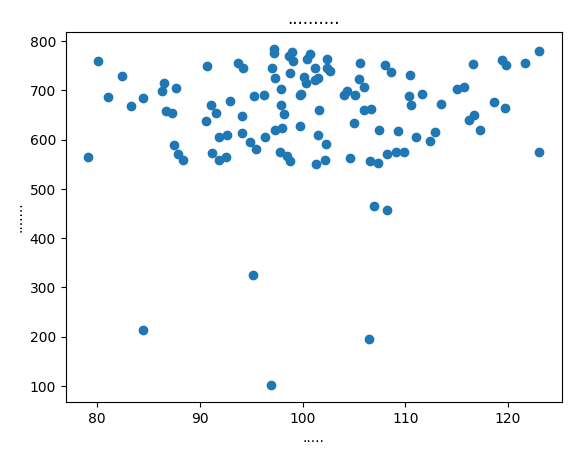

In [42]:
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

In [19]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [21]:
df_rec = df[df['Recession']==1]
df_rec.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
